# Trials Data

In [17]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

dataset = 'D1'

df = pd.read_csv('alltrials.csv', sep=';')
data = df[df['f1']!=0]

testD = data[data['dataset']==dataset]
trainD = data[data['dataset']!=dataset]


In [18]:
features = ['clustering', 'lm', 'k', 'threshold', 'InputEntityProfiles', 'NumberOfAttributes', 'NumberOfDistinctValues', 
            'NumberOfNameValuePairs', 'AverageNVPairsPerEntity', 'AverageDistinctValuesPerEntity', 
            'AverageNVpairsPerAttribute', 'AverageDistinctValuesPerAttribute', 'NumberOfMissingNVpairs', 
            'AverageValueLength', 'AverageValueTokens', 'MaxValuesPerEntity']

y_train = trainD[['f1']]
X_train = trainD[features]
X_test = testD[features]
y_test = testD[['f1']]

Transform categorigal variables

In [19]:
X_train_dummy = pd.get_dummies(X_train)
X_test_dummy = pd.get_dummies(X_test)

dummy_features = X_train_dummy.columns

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dummy)
X_test_scaled = scaler.transform(X_test_dummy)

# AutoML

In [ ]:
import autosklearn.regression as autosklearn

In [6]:
# Initialize Auto-sklearn for regression
automl = autosklearn.AutoSklearnRegressor(
    time_left_for_this_task=60*60,  # Total time for the AutoML process
    per_run_time_limit=300,       # Time for each model
    memory_limit=6144, 
    # verbosity=2,
    # ensemble_size=1               # Use single best model
)

# Fit the model
automl.fit(X_train, y_train, dataset_name='trials_optuna')

# Predict using the best model
y_pred = automl.predict(X_test)

# Evaluate the predictions
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Display the details of the best model
print(automl.show_models())

R2 Score: -0.7631323075200227
Mean Absolute Error: 12.116659890603897
Mean Squared Error: 253.8808916293008
{7: {'model_id': 7, 'rank': 1, 'cost': 0.0005645414762424084, 'ensemble_weight': 1.0, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f1db9ceefd0>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f1db9bc01c0>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7f1db9bc0fd0>, 'sklearn_regressor': ExtraTreesRegressor(bootstrap=True, max_features=0.9615263480351033,
                    n_estimators=512, n_jobs=1, random_state=1,
                    warm_start=True)}}


In [9]:
print(automl.leaderboard())

          rank  ensemble_weight         type      cost    duration
model_id                                                          
7            1              1.0  extra_trees  0.000565  204.149137


In [8]:
from pprint import pprint

pprint(automl.show_models(), indent=4)

{   7: {   'cost': 0.0005645414762424084,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f1db9ceefd0>,
           'ensemble_weight': 1.0,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f1db9bc01c0>,
           'model_id': 7,
           'rank': 1,
           'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7f1db9bc0fd0>,
           'sklearn_regressor': ExtraTreesRegressor(bootstrap=True, max_features=0.9615263480351033,
                    n_estimators=512, n_jobs=1, random_state=1,
                    warm_start=True)}}


In [10]:
from autosklearn.pipeline.components.regression import RegressorChoice

for name in RegressorChoice.get_components():
    print(name)

adaboost
ard_regression
decision_tree
extra_trees
gaussian_process
gradient_boosting
k_nearest_neighbors
liblinear_svr
libsvm_svr
mlp
random_forest
sgd


In [11]:
from autosklearn.pipeline.components.feature_preprocessing import (
    FeaturePreprocessorChoice,
)

for name in FeaturePreprocessorChoice.get_components():
    print(name)

densifier
extra_trees_preproc_for_classification
extra_trees_preproc_for_regression
fast_ica
feature_agglomeration
kernel_pca
kitchen_sinks
liblinear_svc_preprocessor
no_preprocessing
nystroem_sampler
pca
polynomial
random_trees_embedding
select_percentile_classification
select_percentile_regression
select_rates_classification
select_rates_regression
truncatedSVD


In [ ]:
from sklearn.inspection import plot_partial_dependence, permutation_importance

r = permutation_importance(automl, X_test, y_test, n_repeats=10, random_state=0)

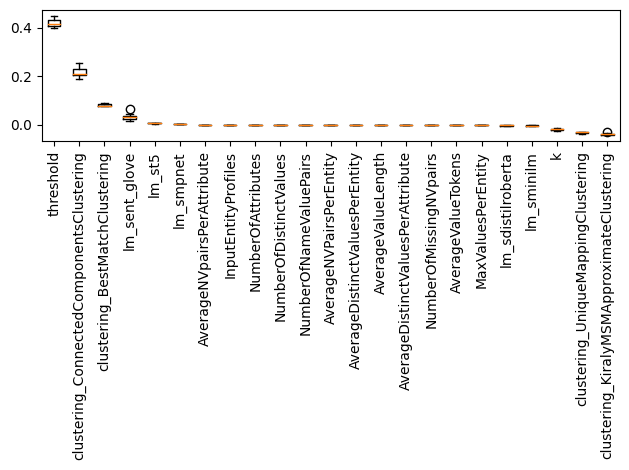

clustering_KiralyMSMApproximateClustering: -0.040 +/- 0.004
clustering_UniqueMappingClustering: -0.033 +/- 0.002
k         : -0.020 +/- 0.004
lm_sminilm: -0.004 +/- 0.002
lm_sdistilroberta: -0.003 +/- 0.002
MaxValuesPerEntity: 0.000 +/- 0.000
AverageValueTokens: 0.000 +/- 0.000
NumberOfMissingNVpairs: 0.000 +/- 0.000
AverageDistinctValuesPerAttribute: 0.000 +/- 0.000
AverageValueLength: 0.000 +/- 0.000
AverageDistinctValuesPerEntity: 0.000 +/- 0.000
AverageNVPairsPerEntity: 0.000 +/- 0.000
NumberOfNameValuePairs: 0.000 +/- 0.000
NumberOfDistinctValues: 0.000 +/- 0.000
NumberOfAttributes: 0.000 +/- 0.000
InputEntityProfiles: 0.000 +/- 0.000
AverageNVpairsPerAttribute: 0.000 +/- 0.000
lm_smpnet : 0.002 +/- 0.000
lm_st5    : 0.006 +/- 0.001
lm_sent_glove: 0.032 +/- 0.013
clustering_BestMatchClustering: 0.081 +/- 0.005
clustering_ConnectedComponentsClustering: 0.217 +/- 0.020
threshold : 0.421 +/- 0.017


In [21]:
sort_idx = r.importances_mean.argsort()[::-1]

plt.boxplot(
    r.importances[sort_idx].T, labels=[dummy_features[i] for i in sort_idx]
)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

for i in sort_idx[::-1]:
    print(
        f"{dummy_features[i]:10s}: {r.importances_mean[i]:.3f} +/- "
        f"{r.importances_std[i]:.3f}"
    )

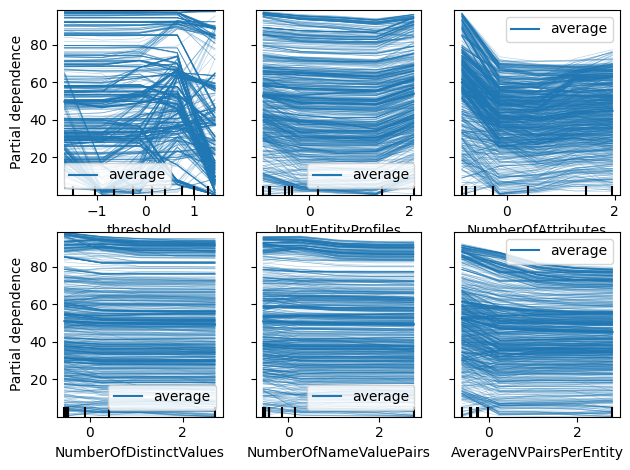

In [24]:
features = [1, 2, 3, 4, 5, 6]
plot_partial_dependence(
    automl,
    X_train_scaled,
    features=features,
    grid_resolution=5,
    kind="both",
    feature_names=dummy_features,
)
# plt.tight_layout()
plt.show()

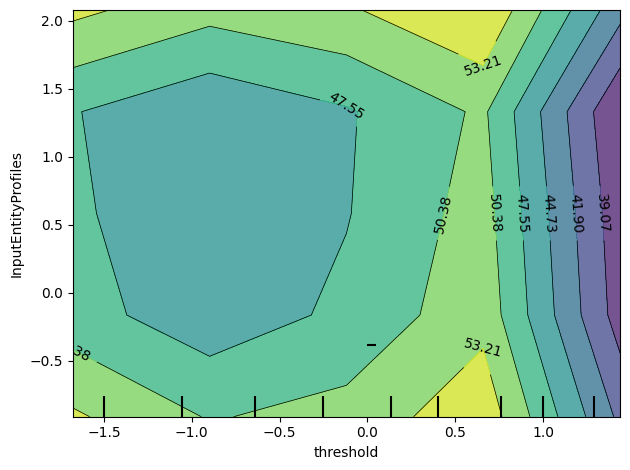

In [23]:
features = [[1, 2]]
plot_partial_dependence(
    automl,
    X_train_scaled,
    features=features,
    grid_resolution=5,
    feature_names=dummy_features,
)
plt.tight_layout()
plt.show()